# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
from numpy import * #Load all the numpy packages



### A Note About "import as"

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://note.io/1juA60F)

In [4]:
import numpy as np
np.zeros??

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [11]:
# Creating arrays
a = np.zeros((3))
##this give ones
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,2)

What are these functions?

    arange?

In [12]:
d

array([ 0,  2,  4,  6,  8, 10])

In [30]:
# Note the way each array is printed:
#a,b,c,d
#np.arange?

In [4]:
## Arithmetic in arrays is element wise

In [13]:
>>> a = np.array( [20,30,40,50] )
>>> b = np.arange( 4,7)
>>> b

array([4, 5, 6])

In [17]:
>>> c = a-2

>>> b

array([4, 5, 6])

In [16]:
>>> b**2

array([16, 25, 36])

## Indexing, Slicing and Iterating

In [18]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [19]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [20]:
a[2:5]

array([ 4,  9, 16])

In [ ]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [27]:
b = np.random.randint(1,100,(4,4))

In [38]:
b

array([[78, 55, 15, 82],
       [55, 13, 40, 65],
       [74, 76, 59, 70],
       [18,  2, 15, 50]])

In [22]:
# Guess the output
print(b[2,3])
b[0,0]


6


98

In [36]:
b[0:3,1],b[:,1]

(array([59,  8, 21]), array([59,  8, 21, 22]))

In [35]:
b

array([[20, 59, 22, 14],
       [36,  8, 90, 51],
       [49, 21, 41, 93],
       [90, 22, 47, 14]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.randn(6,4)

array([[-0.55964728, -0.25925941,  0.44194506,  0.68468247],
       [ 0.21446985, -1.62292776, -0.62918878,  0.42203143],
       [ 2.06863365, -0.49075408, -0.97577792, -0.40140887],
       [ 0.24924197,  0.73898102,  0.28536656, -0.84134775],
       [-0.02834134, -0.23131632, -0.08563864, -0.52193695],
       [ 1.14283388,  0.95545038, -1.15714501,  1.13422473]])

In [67]:
dates = pd.date_range('20140101',periods=6, freq="D")
#pd.date_range??
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [68]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
z.head()

import matplotlib

,A,B,C,D
2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN


In [49]:
# Index, columns, underlying numpy data
df.T


,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00
A,2.879437,-1.587950,1.667989,0.315524,0.279674,-1.213516
B,0.818367,-1.336728,-0.822871,1.905056,2.010312,-0.285162
C,-0.305735,1.713067,-1.019230,0.967706,0.267735,0.081494
D,0.404660,-0.163847,0.526727,0.110309,0.365803,-0.075851


In [18]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1,2013-01-02,1,3,foo
1,1,2013-01-02,1,3,foo
2,1,2013-01-02,1,3,foo
3,1,2013-01-02,1,3,foo


In [19]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [51]:
df.tail(3)

,A,B,C,D
2014-04-30,0.315524,1.905056,0.967706,0.110309
2014-05-31,0.279674,2.010312,0.267735,0.365803
2014-06-30,-1.213516,-0.285162,0.081494,-0.075851


In [53]:
df

,A,B,C,D
2014-01-31,2.879437,0.818367,-0.305735,0.404660
2014-02-28,-1.587950,-1.336728,1.713067,-0.163847
2014-03-31,1.667989,-0.822871,-1.019230,0.526727
2014-04-30,0.315524,1.905056,0.967706,0.110309
2014-05-31,0.279674,2.010312,0.267735,0.365803
2014-06-30,-1.213516,-0.285162,0.081494,-0.075851


In [52]:
df.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', freq='M')

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.465398,-0.062159,0.676270,-0.324321
std,1.210982,2.034606,1.055549,1.214187
min,-1.670217,-3.249906,-0.957359,-1.514520
25%,0.304359,-0.860328,0.134600,-0.918962
50%,0.751930,-0.173121,0.942326,-0.910170
75%,0.775484,1.452408,1.171279,0.249823
max,2.020242,2.318341,2.017370,1.674340


In [24]:
df.sort(columns='B')
df

,A,B,C,D
2014-01-01,0.731803,2.318341,-0.126191,-0.903675
2014-01-02,0.161877,-0.892566,0.967681,-1.514520
2014-01-03,0.776626,1.797420,0.916972,0.634322
2014-01-04,2.020242,-0.763612,1.239145,-0.919727
2014-01-05,0.772058,0.417369,-0.957359,-0.916665
2014-01-06,-1.670217,-3.249906,2.017370,1.674340


### Selection

In [58]:
df[['A','B']]

,A,B
2014-01-31,2.879437,0.818367
2014-02-28,-1.587950,-1.336728
2014-03-31,1.667989,-0.822871
2014-04-30,0.315524,1.905056
2014-05-31,0.279674,2.010312
2014-06-30,-1.213516,-0.285162


In [59]:
df[0:3]

,A,B,C,D
2014-01-31,2.879437,0.818367,-0.305735,0.404660
2014-02-28,-1.587950,-1.336728,1.713067,-0.163847
2014-03-31,1.667989,-0.822871,-1.019230,0.526727


In [60]:
# By label
df.loc['2014-01-31']

A    2.879437
B    0.818367
C   -0.305735
D    0.404660
Name: 2014-01-31 00:00:00, dtype: float64

In [65]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-31,2.879437,0.818367
2014-02-28,-1.587950,-1.336728
2014-03-31,1.667989,-0.822871
2014-04-30,0.315524,1.905056
2014-05-31,0.279674,2.010312
2014-06-30,-1.213516,-0.285162


In [69]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,1.707477
2014-01-03,0.207366
2014-01-04,-0.185261


In [70]:
# Fast access to scalar
df.at[dates[1],'B']

1.7074771567058178

In [73]:
# iloc provides integer locations similar to np style
df.iloc[1,2:]

C   -0.105707
D    0.916873
Name: 2014-01-02 00:00:00, dtype: float64

### Boolean Indexing

In [75]:
df[df.A< 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.061226,-0.154553,-1.343133,-0.984611
2014-01-05,-1.108941,-0.541273,0.200460,-0.543933


### Setting

In [78]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [79]:
df_posA

,A,B,C,D
2014-01-01,0.061226,0.154553,1.343133,0.984611
2014-01-02,0.150531,1.707477,-0.105707,0.916873
2014-01-03,0.181879,0.207366,1.175548,1.102737
2014-01-04,0.080553,-0.185261,1.033120,-0.737729
2014-01-05,1.108941,0.541273,-0.200460,0.543933
2014-01-06,1.101547,0.942644,0.759382,-0.379847


In [80]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [81]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [82]:
df['F'] = s1

In [83]:
df

,A,B,C,D,F
2014-01-01,-0.061226,-0.154553,-1.343133,-0.984611,NaN
2014-01-02,0.150531,1.707477,-0.105707,0.916873,1
2014-01-03,0.181879,0.207366,1.175548,1.102737,2
2014-01-04,0.080553,-0.185261,1.033120,-0.737729,3
2014-01-05,-1.108941,-0.541273,0.200460,-0.543933,4
2014-01-06,1.101547,0.942644,0.759382,-0.379847,5


### Missing Data

In [150]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2014-01-01,0.643581,-0.5773,1.314302,0.823407,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN


In [89]:
df1.loc[dates[0]:dates[1],'E'] = df['C'].mean()

In [92]:
df1.values

array([[-0.06122563, -0.15455307, -1.34313349, -0.98461124,         nan,
         0.28661153],
       [ 0.15053114,  1.70747716, -0.10570667,  0.91687348,  1.        ,
         0.28661153],
       [ 0.1818795 ,  0.20736589,  1.17554766,  1.10273678,  2.        ,
                nan],
       [ 0.08055335, -0.18526113,  1.03311971, -0.73772889,  3.        ,
                nan]])

In [152]:
# find where values are null
df1['A'].isnull()

2014-01-01    False
2014-01-02     True
2014-01-03     True
2014-01-04     True
Freq: D, Name: A, dtype: bool

### Operations

In [ ]:
df.describe()

In [95]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.057391
 B    0.329400
 C    0.286612
 D   -0.104418
 F    3.000000
 dtype: float64, 2014-01-01   -0.635881
 2014-01-02    0.733835
 2014-01-03    0.933506
 2014-01-04    0.638137
 2014-01-05    0.401263
 2014-01-06    1.484745
 Freq: D, dtype: float64)

### Applying functions

In [ ]:
df

In [96]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.061226,-0.154553,-1.343133,-0.984611,NaN
2014-01-02,0.089306,1.552924,-1.448840,-0.067738,1
2014-01-03,0.271185,1.760290,-0.273293,1.034999,3
2014-01-04,0.351738,1.575029,0.759827,0.297270,6
2014-01-05,-0.757202,1.033756,0.960287,-0.246662,10
2014-01-06,0.344345,1.976400,1.719669,-0.626509,15


In [102]:
df.apply(lambda x: x.max() - x.min())

A    2.210488
B    2.248750
C    2.518681
D    2.087348
F    4.000000
dtype: float64

In [108]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.split()

0       [A]
1       [B]
2       [C]
3    [Aaba]
4    [Baca]
5       NaN
6    [CABA]
7     [dog]
8     [cat]
dtype: object

### Merge

In [110]:
np.random.randn(10,4)

array([[ 0.3120544 , -0.86869709,  0.14205696,  0.60547898],
       [-0.05436091,  0.45235198,  1.60002384,  0.1644912 ],
       [ 0.29645642,  0.60430791,  0.02271424,  1.69767684],
       [ 0.43870146, -2.24479994,  1.22592451, -0.36325157],
       [-1.10010109,  0.52287084, -0.33371521,  0.36292749],
       [ 0.25552962,  0.59377154,  1.66264359,  0.69758042],
       [ 1.60402702,  0.20767097,  0.75665401, -0.97149   ],
       [ 1.24625552,  0.95083879,  0.59178342, -0.99488283],
       [-0.99948481,  0.1764281 , -1.82796381, -0.37765489],
       [-0.82248258, -0.33997818,  0.78065909,  1.10535047]])

In [111]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.031462,-1.568726,0.249120,1.515508
1,-0.389300,1.085781,0.491236,-0.773794
2,0.345475,-0.093375,-0.145208,0.879741
3,2.232728,-0.057820,0.597971,1.728692
4,-0.817361,1.365902,1.596822,-0.100602
5,-0.217079,1.442882,1.003390,0.402662
6,-0.874570,0.033967,-1.172392,0.296808
7,1.574646,-1.112807,-0.126599,-0.407592
8,0.569836,0.446096,0.790210,-1.220285
9,0.758282,1.101165,0.119244,-0.354880


In [112]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.031462 -1.568726  0.249120  1.515508
 1 -0.389300  1.085781  0.491236 -0.773794
 2  0.345475 -0.093375 -0.145208  0.879741,
           0         1         2         3
 3  2.232728 -0.057820  0.597971  1.728692
 4 -0.817361  1.365902  1.596822 -0.100602
 5 -0.217079  1.442882  1.003390  0.402662
 6 -0.874570  0.033967 -1.172392  0.296808,
           0         1         2         3
 7  1.574646 -1.112807 -0.126599 -0.407592
 8  0.569836  0.446096  0.790210 -1.220285
 9  0.758282  1.101165  0.119244 -0.354880]

In [113]:
pd.concat(pieces)

,0,1,2,3
0,-0.031462,-1.568726,0.249120,1.515508
1,-0.389300,1.085781,0.491236,-0.773794
2,0.345475,-0.093375,-0.145208,0.879741
3,2.232728,-0.057820,0.597971,1.728692
4,-0.817361,1.365902,1.596822,-0.100602
5,-0.217079,1.442882,1.003390,0.402662
6,-0.874570,0.033967,-1.172392,0.296808
7,1.574646,-1.112807,-0.126599,-0.407592
8,0.569836,0.446096,0.790210,-1.220285
9,0.758282,1.101165,0.119244,-0.354880


In [117]:
# Also can "Join" and "Append"


,0
0,-0.031462
1,-0.389300
2,0.345475
3,2.232728
4,-0.817361
5,-0.217079
6,-0.874570
7,1.574646
8,0.569836
9,0.758282


### Grouping


In [124]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [119]:
df

,A,B,C,D
0,foo,one,-1.468652,-0.523429
1,bar,one,-0.222457,-1.215505
2,foo,two,-2.181331,1.512978
3,bar,three,1.059872,0.664812
4,foo,two,2.202109,-0.218640
5,bar,two,1.072958,-0.974897
6,foo,one,-0.790998,-1.597017
7,foo,three,0.132627,-1.755778


In [122]:
df.groupby('A').sum()

,C,D
A,,
bar,1.910374,-1.525591
foo,-2.106245,-2.581886


### Reshaping

In [ ]:
# You can also stack or unstack levels

In [ ]:
a = df.groupby(['A','B']).sum()

In [130]:
# Pivot Tables
pd.pivot_table(df,['C','D'],"A",['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.059059 -0.802634  1.335360  1.056512 -1.161174 -0.642208
foo -0.453423  0.380104 -0.185248 -0.318983  0.290003  0.470310

### Time Series


In [9]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np


In [2]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')


In [3]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [22]:
ts

2014-01-01 00:00:00    129
2014-01-01 00:00:01    317
2014-01-01 00:00:02    202
2014-01-01 00:00:03    114
2014-01-01 00:00:04     47
2014-01-01 00:00:05    423
2014-01-01 00:00:06     64
2014-01-01 00:00:07    143
2014-01-01 00:00:08    200
2014-01-01 00:00:09    422
2014-01-01 00:00:10    264
2014-01-01 00:00:11    175
2014-01-01 00:00:12    404
2014-01-01 00:00:13     43
2014-01-01 00:00:14    387
2014-01-01 00:00:15    298
2014-01-01 00:00:16    434
2014-01-01 00:00:17    327
2014-01-01 00:00:18    279
2014-01-01 00:00:19    194
2014-01-01 00:00:20    113
2014-01-01 00:00:21    495
2014-01-01 00:00:22    254
2014-01-01 00:00:23    336
2014-01-01 00:00:24    421
2014-01-01 00:00:25    402
2014-01-01 00:00:26    377
2014-01-01 00:00:27    371
2014-01-01 00:00:28    458
2014-01-01 00:00:29    223
                      ... 
2014-01-01 00:01:10    435
2014-01-01 00:01:11     73
2014-01-01 00:01:12    190
2014-01-01 00:01:13    181
2014-01-01 00:01:14    331
2014-01-01 00:01:15    473
2

In [11]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    251.633333
2014-01-01 00:01:00    259.725000
Freq: T, dtype: float64

In [12]:
# Many additional time series features
ts?

### Plotting


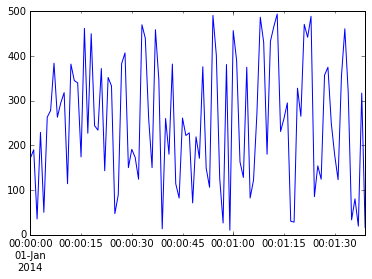

In [4]:
ts.plot()

In [5]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

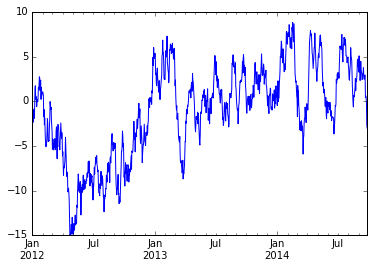

In [6]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

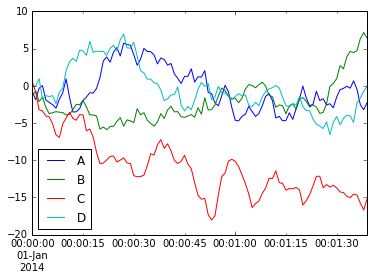

In [10]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas